In [246]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Задание 1

In [247]:
cancer_data = pd.read_csv('cancer.csv')
cancer_label = cancer_data['label']
cancer_x = cancer_data.drop(['label'], axis=1).values
cancer_x = MinMaxScaler().fit_transform(cancer_x)
cancer_x = np.column_stack((cancer_x, np.array([1] * len(cancer_x))))
cancer_label = np.array([1 if label == 'M' else 0 for label in cancer_label.values])
cancer_x_train, cancer_x_eval, cancer_label_train, cancer_label_eval = train_test_split(cancer_x, cancer_label, train_size=0.8)

In [248]:
def classify(w, X):
    classes = []
    for x in X:
        pr = w @ x
        if pr > 0.5:
            classes.append(1)
        else:
            classes.append(0)
    return np.array(classes)


def grad(w, data):
    s = np.zeros(len(data[0][1:]))
    N = 0
    for vec in data:
        x = vec[1:]
        y = vec[0]
        s += y / (1 + np.exp(y * (w @ x))) * x
        N += 1
    return (-1) * s / N

In [249]:
accuracy = []
inds = []
batch_size = 25
w = np.zeros(len(cancer_x_train[0]))
classes = classify(w, cancer_x_eval)
biggest_acc = len(classes[classes == cancer_label_eval]) / len(classes)
best = w
prev = w
k = 0
ind = 0
flag = False
while True:
    prev = best
    bigbigacc = biggest_acc
    for i in range(0, len(cancer_x_train), batch_size):
        X = cancer_x_train[i:i+batch_size]
        Y = cancer_label_train[i:i+batch_size]
        w = w - 0.01 * grad(w, np.column_stack((Y, X)))
        classes = classify(w, cancer_x_eval)
        acc = len(classes[classes == cancer_label_eval]) / len(classes)
        accuracy.append(acc)
        inds.append(ind)
        ind += 1
        if acc <= biggest_acc - 0.001:
            flag = True
            break
        else:
            best = w
            biggest_acc = acc
    if flag:
        break
            

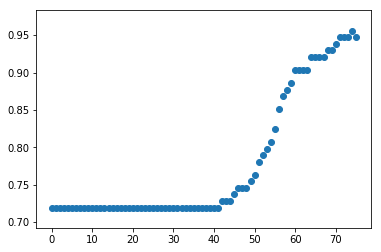

In [250]:
plt.scatter(inds, accuracy)

In [251]:
spam_data = pd.read_csv('spam.csv')
spam_label = spam_data['label']
spam_x = spam_data.drop(['label'], axis=1).values
spam_x = MinMaxScaler().fit_transform(spam_x)
spam_x = np.column_stack((spam_x, np.array([1] * len(spam_x))))
#cancer_label = np.array([1 if label == 'M' else 0 for label in cancer_label.values])
spam_x_train, spam_x_eval, spam_label_train, spam_label_eval = train_test_split(spam_x, spam_label, train_size=0.8)

In [252]:
accuracy = []
inds = []
batch_size = 200
w = np.zeros(len(spam_x_train[0]))
classes = classify(w, spam_x_eval)
biggest_acc = len(classes[classes == spam_label_eval]) / len(classes)
best = w
prev = w
k = 0
ind = 0
flag = False
while True:
    prev = best
    bigbigacc = biggest_acc
    for i in range(0, len(spam_x_train), batch_size):
        X = spam_x_train[i:i+batch_size]
        Y = spam_label_train[i:i+batch_size]
        w = w - 0.01 * grad(w, np.column_stack((Y, X)))
        classes = classify(w, spam_x_eval)
        acc = len(classes[classes == spam_label_eval]) / len(classes)
        accuracy.append(acc)
        inds.append(ind)
        ind += 1
        if acc <= biggest_acc - 0.01:
            flag = True
            break
        else:
            best = w
            biggest_acc = acc
    if flag:
        break

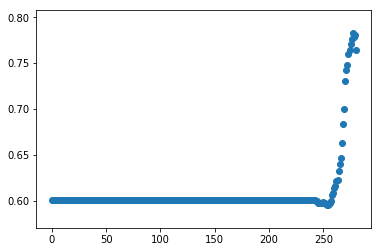

In [253]:
plt.scatter(inds, accuracy)

Задание 2

In [254]:
mnist_data = pd.read_csv('mnist.csv')
print(mnist_data.shape)
mnist_labels = mnist_data['label']
mnist_x = mnist_data.drop(['label'], axis=1).values
new_mnist_x = []
for x in mnist_x:
    matr = []
    k = 0
    for i in range(28):
        a = []
        for j in range(28):
            a.append(x[k])
            k += 1
        matr.append(a)
    new_mnist_x.append([matr])
mnist_x = np.array(new_mnist_x)
print(mnist_x.shape)

(10000, 785)


(10000, 1, 28, 28)


In [255]:
 os.getcwd()
 #os.chdir('../')
# os.getcwd()
#os.chdir('./notMNIST_small')

'/Users/user/PycharmProjects/MLHW1'

In [269]:
notMNIST_small_labels = []
notMNIST_small_x = []
cur_label = 'A'
for path in os.listdir('notMNIST_small'):
    cur_label = path
    print(cur_label)
    for file in os.listdir('notMNIST_small' + '/' + path):
        if os.path.getsize('notMNIST_small' + '/' + path + '/' + file) != 0:
            notMNIST_small_x.append([plt.imread('notMNIST_small' + '/' + path + '/' + file)])
            notMNIST_small_labels.append(cur_label)
notMNIST_small_labels = np.array(notMNIST_small_labels)
notMNIST_small_x = np.array(notMNIST_small_x)

I


G


A


F


H


J


C


D


E


B


In [257]:
print(notMNIST_small_x.shape)

(18724, 28, 28)


Задание 3

In [258]:
mnist_x_train, mnist_x_eval, mnist_labels_train, mnist_labels_eval = train_test_split(mnist_x, mnist_labels, train_size=0.8)

In [259]:
#https://python-scripts.com/build-neural-network
class Net(nn.Module):
    def __init__(self, action):
        super(Net, self).__init__() 
        self.convolution1 = nn.Conv2d(1,8,3)
        self.convolution2 = nn.Conv2d(8,8,3)
        self.convolution3 = nn.Conv2d(8,8,3)
        self.fc1 = nn.Linear(8 * 22 * 22, 64)  # 1й связанный слой
        self.action = action                         # Нелинейный слой
        self.fc2 = nn.Linear(64, 10) # 2й связанный слой
    
    def forward(self, x):                              # Передний пропуск: складывание каждого слоя вместе
        x = self.action(self.convolution1(x))
        x = self.action(self.convolution2(x))
        x = self.action(self.convolution3(x))
        x = x.view(-1, 8 * 22 * 22)
        x = self.action(self.fc1(x))
        x = self.fc2(x)
        return x

In [260]:
t1 = []
for x in mnist_x_train:
    t1.append(torch.Tensor(x))
trl = DataLoader(TensorDataset(torch.stack(t1), torch.Tensor(mnist_labels_train).long()), batch_size=4,shuffle=True )

In [261]:
t2 = []
for x in mnist_x_eval:
    t2.append(torch.Tensor(x))
evl = DataLoader(TensorDataset(torch.stack(t2), torch.Tensor(np.array(mnist_labels_eval)).long()), batch_size=5,shuffle=True )

In [280]:
print('relu')
neural_net1 = Net(F.relu)
epoch = 2
optimr = optim.SGD(neural_net1.parameters(), lr=0.001, momentum=0.9)
for i in range(epoch):
    rl = 0
    for k, t in enumerate(trl, 0):
        xs, ls = t
        optimr.zero_grad()
        outs = neural_net1(xs)
        loss = nn.CrossEntropyLoss()(outs, ls.view(-1))
        loss.backward()
        optimr.step()
        rl += loss.item()
        if (k + 1) % 100 == 0:
            print("[" + str(2) + ", " +  str(k + 1) + "] loss " + str(rl / 100) )
            rl = 0.0
    tpfs = 0.0
    N = 0
    with torch.no_grad():
        for t in evl:
            xs, labels = t
            outs = neural_net1(xs)
            pr = torch.max(outs.data, 1)[1]
            for j in range(pr.size(0)):
                N += 1
                if pr[j] == labels[j]:
                    tpfs += 1
    print("accuracy " + str(tpfs / N))

relu


[2, 100] loss 1.5842681747674943


[2, 200] loss 0.8624229374527931


[2, 300] loss 0.8293401351571084


[2, 400] loss 0.6259609788656235


[2, 500] loss 0.4376927733421326


[2, 600] loss 0.5092439466714859


[2, 700] loss 0.3984462648630142


[2, 800] loss 0.3506566536426544


[2, 900] loss 0.3349562433362007


[2, 1000] loss 0.37261568635702136


[2, 1100] loss 0.341104109287262


[2, 1200] loss 0.2643351539969444


[2, 1300] loss 0.3179240733385086


[2, 1400] loss 0.32115470051765443


[2, 1500] loss 0.1929790759086609


[2, 1600] loss 0.22604171425104141


[2, 1700] loss 0.2504437041282654


[2, 1800] loss 0.2716637718677521


[2, 1900] loss 0.25588771641254426


[2, 2000] loss 0.15115087658166884


accuracy 0.942


[2, 100] loss 0.3643702772259712


[2, 200] loss 0.27668907105922697


[2, 300] loss 0.2582950133085251


[2, 400] loss 0.2514592131972313


[2, 500] loss 0.18047883570194245


[2, 600] loss 0.16991387248039247


[2, 700] loss 0.15001598566770555


[2, 800] loss 0.2277452278137207


[2, 900] loss 0.17617300748825074


[2, 1000] loss 0.12736843883991242


[2, 1100] loss 0.17901306211948395


[2, 1200] loss 0.17946837604045868


[2, 1300] loss 0.2373565450310707


[2, 1400] loss 0.15218584656715392


[2, 1500] loss 0.15746353566646576


[2, 1600] loss 0.17503441303968428


[2, 1700] loss 0.16995774269104003


[2, 1800] loss 0.17412167638540268


[2, 1900] loss 0.1594034445285797


[2, 2000] loss 0.15357474654912948


accuracy 0.9575


In [281]:
print('tanh')
neural_net2 = Net(F.tanh)
epoch = 2
optimr = optim.SGD(neural_net2.parameters(), lr=0.001, momentum=0.9)
for i in range(epoch):
    rl = 0
    for k, t in enumerate(trl, 0):
        xs, ls = t
        optimr.zero_grad()
        outs = neural_net2(xs)
        loss = nn.CrossEntropyLoss()(outs, ls.view(-1))
        loss.backward()
        optimr.step()
        rl += loss.item()
        if (k + 1) % 100 == 0:
            print("[" + str(2) + ", " +  str(k + 1) + "] loss " + str(rl / 100) )
            rl = 0.0
    tpfs = 0.0
    N = 0
    with torch.no_grad():
        for t in evl:
            xs, labels = t
            outs = neural_net2(xs)
            pr = torch.max(outs.data, 1)[1]
            for j in range(pr.size(0)):
                N += 1
                if pr[j] == labels[j]:
                    tpfs += 1
    print("accuracy " + str(tpfs / N))

tanh


[2, 100] loss 2.0721581399440767


[2, 200] loss 1.0653016877174377


[2, 300] loss 0.6516395074129104


[2, 400] loss 0.5749579080939293


[2, 500] loss 0.5087928104400635


[2, 600] loss 0.4474393460154533


[2, 700] loss 0.39703633219003676


[2, 800] loss 0.38814963430166244


[2, 900] loss 0.3808062508702278


[2, 1000] loss 0.3368044704198837


[2, 1100] loss 0.3579221671819687


[2, 1200] loss 0.3440120470523834


[2, 1300] loss 0.2816291564702988


[2, 1400] loss 0.3502041038870811


[2, 1500] loss 0.3434672370553017


[2, 1600] loss 0.31604379951953887


[2, 1700] loss 0.30847554802894595


[2, 1800] loss 0.25398883044719694


[2, 1900] loss 0.23079733908176422


[2, 2000] loss 0.22391043305397035


accuracy 0.925


[2, 100] loss 0.23778727293014526


[2, 200] loss 0.18751559853553773


[2, 300] loss 0.2517437076568603


[2, 400] loss 0.21523745059967042


[2, 500] loss 0.22762020111083983


[2, 600] loss 0.21268319487571716


[2, 700] loss 0.24489453434944153


[2, 800] loss 0.1793753457069397


[2, 900] loss 0.16630350947380065


[2, 1000] loss 0.19457859992980958


[2, 1100] loss 0.18429794907569885


[2, 1200] loss 0.205609992146492


[2, 1300] loss 0.22819141328334808


[2, 1400] loss 0.21955700516700744


[2, 1500] loss 0.1894108098745346


[2, 1600] loss 0.21589939475059508


[2, 1700] loss 0.19981195271015167


[2, 1800] loss 0.22015190362930298


[2, 1900] loss 0.15777244091033935


[2, 2000] loss 0.17863701403141022


accuracy 0.938


In [282]:
print('sigmoid')
neural_net3 = Net(F.sigmoid)
epoch = 2
optimr = optim.SGD(neural_net3.parameters(), lr=0.001, momentum=0.9)
for i in range(epoch):
    rl = 0
    for k, t in enumerate(trl, 0):
        xs, ls = t
        optimr.zero_grad()
        outs = neural_net3(xs)
        loss = nn.CrossEntropyLoss()(outs, ls.view(-1))
        loss.backward()
        optimr.step()
        rl += loss.item()
        if (k + 1) % 100 == 0:
            print("[" + str(2) + ", " +  str(k + 1) + "] loss " + str(rl / 100) )
            rl = 0.0
    tpfs = 0.0
    N = 0
    with torch.no_grad():
        for t in evl:
            xs, labels = t
            outs = neural_net3(xs)
            pr = torch.max(outs.data, 1)[1]
            for j in range(pr.size(0)):
                N += 1
                if pr[j] == labels[j]:
                    tpfs += 1
    print("accuracy " + str(tpfs / N))

sigmoid


[2, 100] loss 1.4935320436954498


[2, 200] loss 1.1106146448850631


[2, 300] loss 0.8376926782727242


[2, 400] loss 0.6515649098157883


[2, 500] loss 0.535327824652195


[2, 600] loss 0.4790669038891792


[2, 700] loss 0.3041967499256134


[2, 800] loss 0.5416801714897156


[2, 900] loss 0.30807311803102494


[2, 1000] loss 0.3918309536576271


[2, 1100] loss 0.2843442523479462


[2, 1200] loss 0.2573412442207336


[2, 1300] loss 0.2302682074904442


[2, 1400] loss 0.24717441767454149


[2, 1500] loss 0.21130383074283599


[2, 1600] loss 0.27290642619132993


[2, 1700] loss 0.25098705261945725


[2, 1800] loss 0.22585137456655502


[2, 1900] loss 0.2784845843911171


[2, 2000] loss 0.07577138781547546


accuracy 0.9395


[2, 100] loss 0.21424076557159424


[2, 200] loss 0.19273580759763717


[2, 300] loss 0.21371522724628447


[2, 400] loss 0.16257637202739716


[2, 500] loss 0.15382540106773376


[2, 600] loss 0.1779417061805725


[2, 700] loss 0.18603299647569657


[2, 800] loss 0.17841750621795655


[2, 900] loss 0.17322173595428467


[2, 1000] loss 0.169003626704216


[2, 1100] loss 0.16990321457386018


[2, 1200] loss 0.12105210900306701


[2, 1300] loss 0.1326449543237686


[2, 1400] loss 0.13738826870918275


[2, 1500] loss 0.22121696591377257


[2, 1600] loss 0.22055665880441666


[2, 1700] loss 0.1603083872795105


[2, 1800] loss 0.2444873958826065


[2, 1900] loss 0.20311177492141724


[2, 2000] loss 0.15151870965957642


accuracy 0.955


In [292]:
mnist_x_train, mnist_x_eval, mnist_labels_train, mnist_labels_eval = train_test_split(notMNIST_small_x, notMNIST_small_labels, train_size=0.9)

Задание 4

In [295]:
print('relu')
neural_net = Net(F.relu)
epoch = 2
optimr = optim.SGD(neural_net.parameters(), lr=0.005, momentum=0.9)
acc = 0
while acc < 0.87:
    rl = 0
    for k, t in enumerate(trl, 0):
        xs, ls = t
        optimr.zero_grad()
        outs = neural_net(xs)
        loss = nn.CrossEntropyLoss()(outs, ls.view(-1))
        loss.backward()
        optimr.step()
        rl += loss.item()
        if (k + 1) % 100 == 0:
            print("[" + str(2) + ", " +  str(k + 1) + "] loss " + str(rl / 100))
            rl = 0.0
    tpfs = 0.0
    N = 0
    with torch.no_grad():
        for t in evl:
            xs, labels = t
            outs = neural_net(xs)
            pr = torch.max(outs.data, 1)[1]
            for j in range(pr.size(0)):
                N += 1
                if pr[j] == labels[j]:
                    tpfs += 1
    print("accuracy " + str(tpfs / N))
    acc = tpfs / N

relu


[2, 100] loss 2.255184757709503


[2, 200] loss 2.0155747854709625


[2, 300] loss 1.9180078387260437


[2, 400] loss 1.7002407222986222


[2, 500] loss 1.5687793269753456


[2, 600] loss 1.6886171114444732


[2, 700] loss 1.5172352793812751


[2, 800] loss 2.3685114586353304


[2, 900] loss 2.1015749990940096


[2, 1000] loss 1.5603172636032105


[2, 1100] loss 1.1030340990424157


[2, 1200] loss 0.8300529491901397


[2, 1300] loss 0.945858528316021


[2, 1400] loss 0.7511605158448219


[2, 1500] loss 0.8168084979057312


[2, 1600] loss 0.6627012786269187


[2, 1700] loss 0.5887615874409675


[2, 1800] loss 0.668185693025589


[2, 1900] loss 0.5573740404844284


[2, 2000] loss 0.5749480712413788


accuracy 0.828


[2, 100] loss 0.579260131418705


[2, 200] loss 0.524039920270443


[2, 300] loss 0.36056091338396073


[2, 400] loss 0.49104167938232424


[2, 500] loss 0.48192631512880324


[2, 600] loss 0.45459129840135576


[2, 700] loss 0.4455763083696365


[2, 800] loss 0.3687378591299057


[2, 900] loss 0.3596147298812866


[2, 1000] loss 0.37431854993104935


[2, 1100] loss 0.3246146649122238


[2, 1200] loss 0.3505014878511429


[2, 1300] loss 0.40499123573303225


[2, 1400] loss 0.41522406578063964


[2, 1500] loss 0.5439296787977219


[2, 1600] loss 0.3368798792362213


[2, 1700] loss 0.39712013840675353


[2, 1800] loss 0.4840779364109039


[2, 1900] loss 0.37095170468091965


[2, 2000] loss 0.3413337391614914


accuracy 0.8915
